In [1]:
# 各ライブラリのインストール
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import statistics

In [2]:
# 個体クラスの定義
class Agent():
    def __init__(self, x):
        self.sex = np.random.choice(["m", "f"], p=[0.5, (1-0.5)])
        self.life_length = x
        self.age = 0
        self.cool_time = 0
        self.resource = 1
        self.death = False

    # 歳を取る
    def aging(self):
        self.age += 1
        
        self.resource -= 1

        if self.cool_time != 0:
            self.cool_time -= 1

    # 死亡処理
    def judge_death(self):
        if self.age == self.life_length:
            self.death = True
        elif self.resource == 0:
            self.death = True

In [3]:
# シミュレーションクラスの定義
class Simulation():
    def __init__(self, x, firstsize, max_resource):
        self.population = self.__initialize(x, firstsize)
        self.max_resource = max_resource

    # 初期集団をつくる
    def __initialize(self, x, firstsize):
        population = []

        for i in range(firstsize):
            population.append(Agent(x))
        
        return population


    # 次世代の寿命の決定
    def __make_nextGen(self, female, male):
        ave = 0
        nextgen = -1
    
        # 両親の性比強度の平均
        ave = (female.life_length + male.life_length) / 2
        # 平均ave、分散2の正規分布から次世代の値を決定
        while nextgen < 6:
            nextgen = int(np.random.normal(ave, 2))
    
        return nextgen


    # 集団内の交尾
    def __copulation(self):
        male_population = []
        female_population = []
        newgen = []

        # オスメスの振り分け
        # 生殖可能な個体を選ぶ
        for focal in self.population:
            if (focal.sex == 'm') and (focal.age > 5):
                male_population.append(focal)
            elif (focal.sex == 'f') and (focal.age > 5) and (focal.cool_time == 0):
                female_population.append(focal)

        # 交尾の回数を決定
        if len(female_population) >= len(male_population):
            cop_i = len(male_population)
        else:
            cop_i = len(female_population)
        
        # 交尾させる雌雄の抽出と交配
        # クールタイムの発生
        for i in range(cop_i):
            cop_female = female_population.pop(random.randrange(len(female_population)))
            cop_male = male_population.pop(random.randrange(len(male_population)))
            newgen.append(self.__make_nextGen(cop_female, cop_male))
            
            cop_female.cool_time = 5
        
        return newgen

    
    # 資源の分配
    def __distribution(self):
        random.shuffle(self.population)
        x = self.max_resource
        if x < len(self.population):
            for i in range(x):
                self.population[i].resource += 1
        else:
            for focal in self.population:
                focal.resource += 1


    # 1世代のシミュレーションを実行
    def run_one_episode(self):
            
        newegg = self.__copulation()
        for i in newegg:
            self.population.append(Agent(i))

        self.__distribution()

        for focal in self.population:
            focal.aging()
            focal.judge_death()
            if focal.death:
                index = self.population.index(focal)
                del self.population[index]

In [6]:
# main処理
def main(x, firstsize, max_resource, iteration):
    t = list(range(1, (iteration + 1)))
    whole_size = []
    life_length = []
    simulation = Simulation(x, firstsize, max_resource)
    
    for i in tqdm(range(iteration)):
        simulation.run_one_episode()

        ll = []
        for focal in simulation.population:
            ll.append(focal.life_length)
        whole_size.append(len(simulation.population))
        life_length.append(np.sum(ll) / len(simulation.population))

    plt.figure()
    plt.plot(t, life_length)
    plt.title('life length')
    plt.xlabel('Generations')
    plt.grid(True)

    plt.figure()
    plt.plot(t, whole_size)
    plt.title('whole size')
    plt.xlabel('Generations')
    plt.grid(True)

100%|██████████| 3000/3000 [00:16<00:00, 184.52it/s]


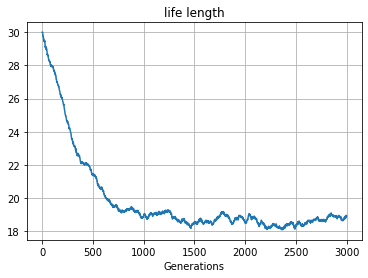

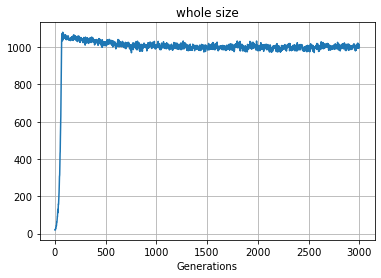

In [7]:
# 初期寿命30、初期集団サイズ20、総資源1000、ループ回数3000
main(30, 20, 1000, 3000)

100%|██████████| 100/100 [00:00<00:00, 2047.12it/s]


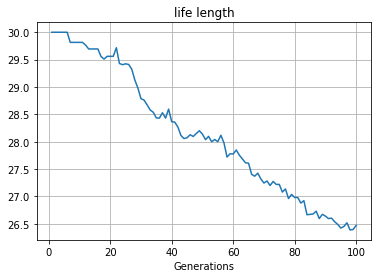

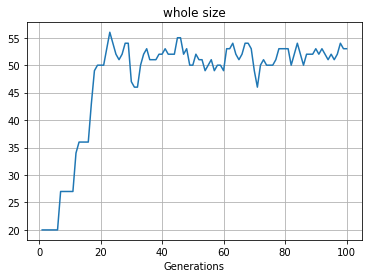

In [8]:
# 初期寿命30、初期集団サイズ20、総資源50、ループ回数100
main(30, 20, 50, 100)

In [9]:
# main処理
def main_L(x, firstsize, max_resource_list, iteration):
    t = list(range(1, (iteration + 1)))
    whole_size = []
    life_length = []

    for max_resource in max_resource_list:
        whole_size_2 = []
        life_length_2 = []
        simulation = Simulation(x, firstsize, max_resource)

        for i in tqdm(range(iteration)):
            simulation.run_one_episode()

            ll = []
            for focal in simulation.population:
                ll.append(focal.life_length)
            whole_size_2.append(len(simulation.population))
            life_length_2.append(np.sum(ll) / len(simulation.population))

        whole_size.append(whole_size_2)
        life_length.append(life_length_2)

    plt.figure()
    for i in range(len(max_resource_list)):
        plt.plot(t, life_length[i], label=(f'{max_resource_list[i]}'))
    plt.title('life length')
    plt.xlabel('Generations')
    plt.legend()
    plt.grid(True)

    plt.figure()
    for i in range(len(max_resource_list)):
        plt.plot(t, whole_size[i])
    plt.title('whole size')
    plt.xlabel('Generations')
    plt.grid(True)

100%|██████████| 3000/3000 [00:41<00:00, 73.05it/s]


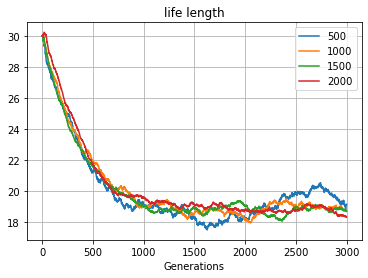

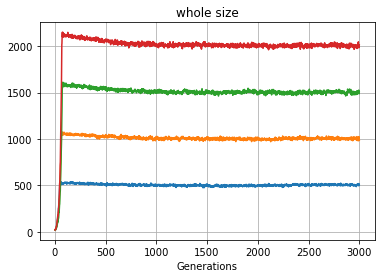

In [11]:
main_L(30, 20, [500, 1000, 1500, 2000], 3000)

In [4]:
# main処理(最頻値)
def main_L_2(x, firstsize, max_resource_list, iteration):
    t = list(range(1, (iteration + 1)))
    whole_size = []
    life_length = []

    for max_resource in max_resource_list:
        whole_size_2 = []
        life_length_2 = []
        simulation = Simulation(x, firstsize, max_resource)

        for i in tqdm(range(iteration)):
            simulation.run_one_episode()

            ll = []
            for focal in simulation.population:
                ll.append(focal.life_length)
            whole_size_2.append(len(simulation.population))
            life_length_2.append(statistics.mode(ll))

        whole_size.append(whole_size_2)
        life_length.append(life_length_2)

    plt.figure()
    for i in range(len(max_resource_list)):
        plt.plot(t, life_length[i], label=(f'{max_resource_list[i]}'))
    plt.title('life length')
    plt.xlabel('Generations')
    plt.legend()
    plt.grid(True)

    plt.figure()
    for i in range(len(max_resource_list)):
        plt.plot(t, whole_size[i])
    plt.title('whole size')
    plt.xlabel('Generations')
    plt.grid(True)

100%|██████████| 3000/3000 [01:00<00:00, 49.58it/s]


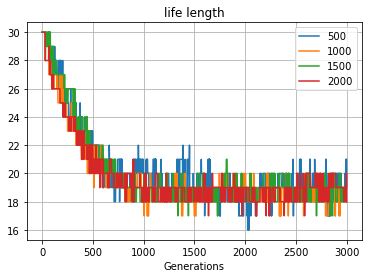

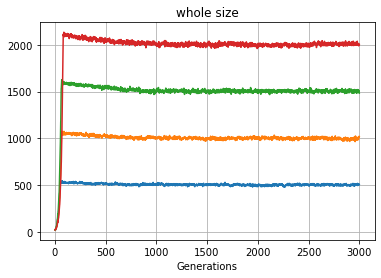

In [5]:
main_L_2(30, 20, [500, 1000, 1500, 2000], 3000)